In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats

In [2]:
file_path = f'HousingData.csv'
df = pd.read_csv(file_path)
display(df.head())
df.shape

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


(506, 14)

In [3]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
df.dropna(inplace=True,axis=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435972,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:xlabel='DIS'>

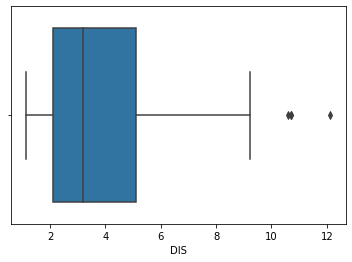

In [7]:
sns.boxplot(x=df['DIS'])

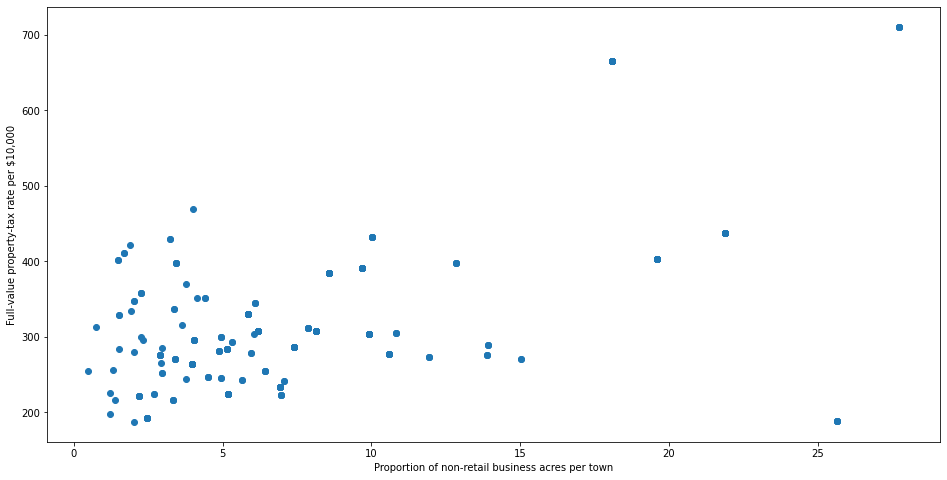

In [8]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['INDUS'], df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

In [9]:
z = np.abs(stats.zscore(df))
print(z)

[[0.40081837 0.27334191 1.25962    ... 0.43074011 1.06712587 0.17963958]
 [0.39853454 0.47905119 0.56972405 ... 0.43074011 0.49719648 0.08319067]
 [0.39853672 0.47905119 0.56972405 ... 0.38509692 1.19727801 1.35142445]
 ...
 [0.3965804  0.47905119 0.13466553 ... 0.43074011 0.50541662 0.19270327]
 [0.39489501 0.47905119 0.13466553 ... 0.43074011 0.97670438 0.16868832]
 [0.38958205 0.47905119 0.13466553 ... 0.39204993 0.86162248 0.03938562]]


In [10]:
threshold = 3
print(np.where(z > 3))

(array([ 45,  46,  47,  87, 118, 125, 126, 129, 130, 131, 131, 134, 155,
       158, 159, 162, 163, 163, 164, 165, 166, 167, 170, 172, 173, 174,
       175, 178, 178, 183, 199, 200, 200, 208, 210, 213, 214, 216, 220,
       221, 221, 221, 222, 272, 274, 275, 276, 276, 277, 278, 279, 280,
       284, 285, 285, 286, 288, 288, 289, 290, 290, 291, 292, 292, 296,
       310, 315, 316, 318, 318, 319, 320, 322, 322, 322, 323, 324, 326,
       326, 327, 331, 332, 334, 339, 340, 341, 345, 351, 352, 353, 354],
      dtype=int64), array([ 1,  1,  1, 11,  3,  3, 11,  3, 13,  3, 13, 13, 13,  1,  1,  1,  1,
       13,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5, 13,  3,  1,  5, 13, 13,
        3,  3,  3,  3,  3,  1,  3, 13,  1,  1,  7,  7,  1,  7,  7,  3,  3,
        3,  3,  3,  5,  5,  3, 13, 13,  3, 13, 12,  5, 12,  0,  0,  0,  0,
        0, 11, 11, 11,  0, 11, 12, 11, 11,  0, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11], dtype=int64))


In [11]:
print(z[45][1])

3.2829142822588087


In [12]:
df.shape

(394, 14)

In [13]:
df = df[(z < 3).all(axis=1)]

In [23]:
df.shape

(157, 14)

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         1.396540
ZN           9.375000
INDUS       12.970000
CHAS         0.000000
NOX          0.155000
RM           0.632500
AGE         48.800000
DIS          2.983825
RAD          3.750000
TAX        156.000000
PTRATIO      2.400000
B           17.067500
LSTAT        8.870000
MEDV         7.075000
dtype: float64


In [16]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(157, 14)

In [17]:
# multiply and add by random numbers to get some real values
data = np.random.randn(50000)  * 20 + 20

# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    data_std = np.std(data)
    data_mean = np.mean(data)
    
    lower_limit  = data_mean - 3 * data_std
    upper_limit = data_mean + 3 * data_std
    print(lower_limit, upper_limit)
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

find_anomalies(data)

-39.31263568341805 79.42125559199188


[-42.208254838153124,
 -44.772711650832434,
 -41.68703476602487,
 82.10845880721592,
 -41.13233642897831,
 81.00991569348295,
 80.60965884583672,
 -53.78053592137286,
 82.10160088067535,
 84.58531816563122,
 -41.1710389594116,
 -51.966879217464324,
 86.78206918696671,
 83.83481201275004,
 -45.16892980260829,
 -44.83429953990944,
 81.50078662965822,
 -46.914400710770934,
 86.76751995302445,
 -52.37820773216684,
 -41.68103877765998,
 -57.32663525977975,
 -41.520047892323234,
 86.60808766935799,
 -40.41110349157802,
 82.90847398683508,
 83.35715847430228,
 83.28415925438026,
 85.19257174182235,
 -45.504444917369554,
 80.50859587499745,
 -46.684310065477604,
 -39.85174640348647,
 80.44750462165537,
 87.20652834766182,
 -42.63652928566769,
 82.34324632260987,
 -43.22374260579046,
 -40.35769632897188,
 -48.489512504431005,
 79.43305119207864,
 79.63064277993713,
 81.20855408960725,
 -39.41531794885221,
 -39.80947656687416,
 90.35479192041203,
 88.63735746815802,
 79.51222184095131,
 88.47492

In [18]:
!jupyter nbconvert FindingandDetectingOutlier.ipynb --to slides --post serve

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too

[NbConvertApp] WARNING | pattern 'FindingandDetectingOutlier.ipynb' matched no files


    Write notebook output to stdout instead of files.
    Equivalent to: [--NbConvertApp.writer_class=StdoutWriter]
--inplace
    Run nbconvert in place, overwriting the existing notebook (only 
    relevant when converting to notebook format)
    Equivalent to: [--NbConvertApp.use_output_suffix=False --NbConvertApp.export_format=notebook --FilesWriter.build_directory=]
--clear-output
    Clear output of current file and save in place, 
    overwriting the existing notebook.
    Equivalent to: [--NbConvertApp.use_output_suffix=False --NbConvertApp.export_format=notebook --FilesWriter.build_directory= --ClearOutputPreprocessor.enabled=True]
--no-prompt
    Exclude input and output prompts from converted document.
    Equivalent to: [--TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True]
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
    Equivalent to: [--Templat